<a href="https://colab.research.google.com/github/EloiseDerham/NLP-tweet-classification/blob/main/nlpTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras.utils

from keras import models
from keras import layers
from keras.datasets import imdb
import requests

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

Processing my collected tweets using nltk

In [ ]:
data = pd.read_csv('Tweets.csv', encoding='cp1252')
data.head(3)

,id,label,tweet
0,1,0,baking some cookies today
1,2,0,Our tween girls holiday cookie baking play dat...
2,3,0,Baking is frequently a team effort at the mona...


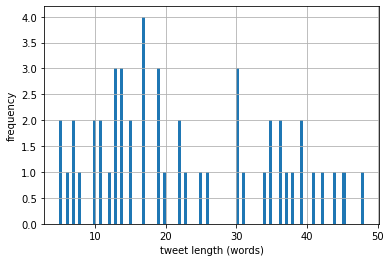

In [ ]:
words_per_tweet = data.tweet.apply(lambda x: len(x.split(" ")))
words_per_tweet.hist(bins = 100);
plt.xlabel("tweet length (words)")
plt.ylabel("frequency")
plt.show();

In [ ]:
print ('Average Words:', words_per_tweet.mean())

Average Words: 22.72


In [ ]:
pip install wordcloud

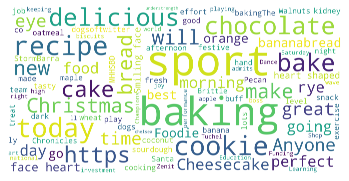

In [ ]:
word_cloud_text = ''.join(data['tweet'])
wordcloud = WordCloud(max_font_size=100,
                      max_words= 100,
                      background_color="white",
                      scale = 10,
                      width = 800,
                      height = 400,).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

above is a visualiseation of the collected text data can help to get an idea of the most important words within the dataset, unsuprisingly these are sport and baking.
other interesting words are one that dont relate to the classifcation of the tweet such as anyonr or https, these are words we want to try to get rid of in the text cleaning process.

In [ ]:
data['label'].value_counts()

1    25
0    25
Name: label, dtype: int64

as i made this dataset myself it has equal parts sports tweets as it does baking however in other datasets based on more realistic data this will not be the case value_counts() can give important information about the number of different labels within the dataset for example for a sentiment analysis dataset it could be the number of positibe vs negative reviews.

Pre-processing steps:
lower case words
remove special characters  
tweet tokenize
remove stopwords
stemming to simplify amount of words


In [ ]:
data['tweet_processed'] = data['tweet'].str.lower()

In [ ]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tt = TweetTokenizer()
token_lists = [word_tokenize(each) for each in data['tweet_processed']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens",len(set(tokens)))

Tweet_token_lists = [tt.tokenize(each) for each in data['tweet_processed']]
tokens = [item for sublist in Tweet_token_lists for item in sublist]
print("Number of unique tokens",len(set(tokens)))

Number of unique tokens 691
Number of unique tokens 712


In [ ]:
data['tweet_processed'] = data['tweet_processed'].str.replace(r'[^a-z ]',' ')
print('New Review')
print(data['tweet_processed'][10])

New Review
today was the perfect day to help my nan with christmas baking   st in the oven  shortbread cookies  my job is to watch them so that they don t burn  i m going to share these with santa paws on christmas eve santa clauscookie  dogs  dogsoftwitter  christmas  baking  mondaymotivation


In [ ]:
token_lists = [word_tokenize(each) for each in data['tweet_processed']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens",len(set(tokens)))


Number of unique tokens 686


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# sentence = data['tweet_processed'][0]
# words = nltk.word_tokenize(sentence)

def stopwords_removal(stop_words, sentence):
  return[word for word in nltk.word_tokenize(sentence) if word not in stop_words]

data['tweet_nonstop'] = data['tweet_processed'].apply(lambda row: stopwords_removal(eng_stop_words, row))

In [ ]:
data[['tweet_processed','tweet_nonstop']]

,tweet_processed,tweet_nonstop
0,baking some cookies today,"[baking, cookies, today]"
1,our tween girls holiday cookie baking play dat...,"[tween, girls, holiday, cookie, baking, play, ..."
2,baking is frequently a team effort at the mona...,"[baking, frequently, team, effort, monastery, ..."
3,christmas can be a stressful time when it come...,"[christmas, stressful, time, comes, cooking, h..."
4,has anyone else been baking today i ve made l...,"[anyone, else, baking, today, made, lots, yumm..."
5,school of chocolate serves up major great brit...,"[school, chocolate, serves, major, great, brit..."
6,morning i got up early and helped in the kitc...,"[morning, got, early, helped, kitchen, make, s..."
7,the maple frosting on these oatmeal cookies ta...,"[maple, frosting, oatmeal, cookies, takes, ano..."
8,anyone for a kidney cookie anatomy kidney ...,"[anyone, kidney, cookie, anatomy, kidney, baki..."
9,over the weekend i gave my rye sourdough start...,"[weekend, gave, rye, sourdough, starter, exerc..."


stemming an lemmatiztion

In [ ]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             stop_words=noise_words,
                             ngram_range=(1,1))
bow_data = bow_counts.fit_transform(data['tweet'])


In [ ]:
bow_data

<50x691 sparse matrix of type '<class 'numpy.int64'>'
	with 1211 stored elements in Compressed Sparse Row format>

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# vec = CountVectorizer()
# X = vec.fit_transform(data['tweet_nonstop'])
# df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
# df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['label'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [ ]:
y_test_bow.value_counts()/y_test_bow.shape[0]


1    0.5
0    0.5
Name: label, dtype: float64

In [ ]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  1.0


In [ ]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words,weights
550,sport,0.926572
605,to,0.316753
589,the,0.306516
73,at,0.290570
554,sports,0.275601
55,and,0.208807
687,’,0.197874
263,from,0.193202
294,have,0.186279
172,cycling,0.180972


In [ ]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews


,words,weights
544,some,-0.180001
496,recipe,-0.181595
350,kidney,-0.188325
337,is,-0.189220
164,cooking,-0.197039
78,bake,-0.197170
122,cakes,-0.202806
163,cookies,-0.206115
183,delicious,-0.212227
645,was,-0.215564


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(data['tweet'])

In [ ]:
tfidf_data

<50x691 sparse matrix of type '<class 'numpy.float64'>'
	with 1211 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            data['label'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  1.0
